<a href="https://colab.research.google.com/github/pjloor/machinelearning-pedroloor/blob/main/Copia_de_Pandas_Exercise_A_for_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Import pandas as pd and load the dataset

In [ ]:
# Use this line to load the dataset.
import pandas as pd
url='https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/cta_Ridership.csv'
# your code here
df=pd.read_csv(url)
pass


Basic Exploration

Let's first take a quick look at what this data looks like.

In [ ]:
# for basic exploration, we suggest to use shape, head(), tail(), dtypes, type() modules
# your code here
pass
df.shape

(1145586, 5)

In [ ]:
df.head(5)


,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [ ]:
df.tail(5)

,station_id,stationname,date,daytype,rides
1145581,41700,Washington/Wabash,12/27/2022,W,3991
1145582,41700,Washington/Wabash,12/28/2022,W,4100
1145583,41700,Washington/Wabash,12/29/2022,W,4741
1145584,41700,Washington/Wabash,12/30/2022,W,4664
1145585,41700,Washington/Wabash,12/31/2022,A,2774


In [ ]:
df.dtypes

station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object

In [ ]:
type(df)

pandas.core.frame.DataFrame

What are some basic statistics about the data?

In [ ]:
# use the describe module
# your code here
pass
df.describe()

,station_id,rides
count,1.145586e+06,1.145586e+06
mean,4.076649e+04,3.056635e+03
std,4.490665e+02,3.118576e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,9.630000e+02
50%,4.076000e+04,2.004000e+03
75%,4.115000e+04,4.025000e+03
max,4.170000e+04,3.632300e+04


Selection Based on Conditionals

Let's see which stations have the most and fewest rides.


In [ ]:
# use the min() and max() modules
# your code here
pass
print(df['rides'].min())

0


In [ ]:
print(df['rides'].max())

36323


In [ ]:
df.columns

Index(['station_id', 'stationname', 'date', 'daytype', 'rides'], dtype='object')

In [ ]:
filter=df['rides'].max()
print(filter)

36323


In [ ]:
filter=df['stationname'].min()
print(filter)

18th


Create a Time Index

So we have all rides from January 1, 2001 to December 31, 2019. Let's do some statistics that group ride statistics by date. First we need to tell Pandas that the date column is in fact a date. So, we convert the column to a proper 'DateTime' type, and then set the index to this column.

This step takes a little bit of time!

The following picture show the desired output

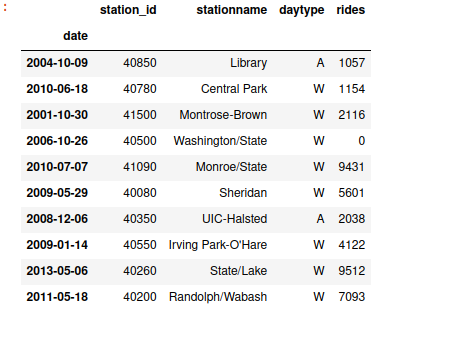

In [22]:
# hint, use to_datetime() and set_index()  modules
# your code here
import pandas as pd

# Convert 'date' column to datetime format
rides['date'] = pd.to_datetime(rides['date'])

# Set 'date' column as the index
rides.set_index('date', inplace=True)

# Sort the DataFrame by the index (which is now the 'date' column)
rides.sort_index(inplace=True)

NameError: ignored

Sort the Dataframe by Date

In [23]:
# hint, sort_values(by='date')
# your code here

rides.sort_values(by='date', inplace=True)
rides.sort_values(by='date', inplace=True, ascending=False)

NameError: ignored

Sanity Checking

Looks good! Now let's have a quick look at data for specific stations:
'Garfield-Dan Ryan' and 'Garfield-South Elevated'


In [9]:
# hint, use filter like, df['stationname']=='Garfield-Dan Ryan']
# your code here
# use the following variable name for your specific stations
import pandas as pd
Garfield_Dan_Ryan=pd.DataFrame()

data = {'stationname': ['Garfield-Dan Ryan', 'Lake', 'Garfield-Dan Ryan', 'Jackson', 'Garfield-Dan Ryan'],
        'other_column': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
Garfield_Dan_Ryan = df[df['stationname'] == 'Garfield-Dan Ryan']

# Print the resulting DataFrame
print(Garfield_Dan_Ryan)

         stationname  other_column
0  Garfield-Dan Ryan             1
2  Garfield-Dan Ryan             3
4  Garfield-Dan Ryan             5


In [8]:
# hint, use filter like this df['stationname']=='Garfield-South Elevated']
# your code here
# use the following variable name for your specific stations
Garfield_South_Elevated=pd.DataFrame()
Garfield_South_Elevated = df[df['stationname'] == 'Garfield-South Elevated']

# Print the resulting DataFrame
print(Garfield_South_Elevated)

Empty DataFrame
Columns: [stationname, other_column]
Index: []


Visualizing Timeseries Data

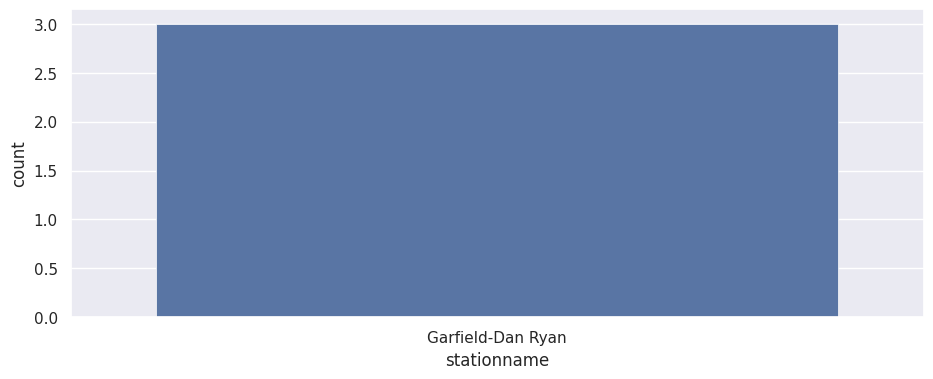

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

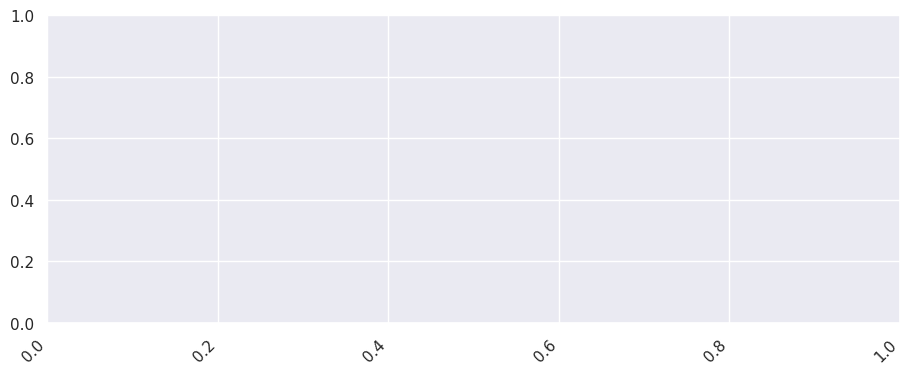

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
sns.countplot(data=Garfield_Dan_Ryan, x='stationname', linewidth=0.5)

# Show the plot
plt.show()
plt.xticks(rotation=45, ha='right')

In [13]:
sns.set(rc={'figure.figsize':(11, 4)})
# Garfield_South_Elevated['rides'].plot(linewidth=0.5)

if 'rides' in Garfield_South_Elevated.columns:
    # Check if the 'rides' column contains numeric data
    if pd.api.types.is_numeric_dtype(Garfield_South_Elevated['rides']):
        # Plot the 'rides' column
        Garfield_South_Elevated['rides'].plot(linewidth=0.5)

        # Show the plot
        plt.show()
    else:
        print("'rides' column is not numeric.")
else:
    print("'rides' column does not exist in the DataFrame.")

'rides' column does not exist in the DataFrame.
